In [1]:
# Mushtariy 201939183

In [2]:
from collections import Counter
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split 

In [3]:
# read data and show head

In [4]:
df_smoker = pd.read_csv('/Users/mushtariy/pyprojects/Machine_Learning/machine_learning/Smoker_dataset.csv')
df_smoker.head()

,Gene2337,Gene35715,Gene12936,Gene1689,FGFR1,GATA4,type,Condition
0,-4.750470,-1.518091,6.715013,-1.722331,0.170110,-7.846961,Smoker,Cancer
1,-5.183375,0.039654,2.529460,-1.323490,-0.315844,-4.447406,Smoker,Cancer
2,1.579079,1.588153,0.569724,-1.229601,-4.119116,0.649277,Smoker,Normal
3,-1.557053,-3.818996,3.798518,-1.204911,1.010464,-6.712354,Smoker,Cancer
4,-1.329637,-3.623963,2.722249,-0.784387,1.564218,-5.580853,Smoker,Cancer


In [5]:
#  diplaying whole data 

In [6]:
print(df_smoker.to_string())

       Gene2337  Gene35715  Gene12936   Gene1689      FGFR1      GATA4       type Condition
0     -4.750470  -1.518091   6.715013  -1.722331   0.170110  -7.846961     Smoker    Cancer
1     -5.183375   0.039654   2.529460  -1.323490  -0.315844  -4.447406     Smoker    Cancer
2      1.579079   1.588153   0.569724  -1.229601  -4.119116   0.649277     Smoker    Normal
3     -1.557053  -3.818996   3.798518  -1.204911   1.010464  -6.712354     Smoker    Cancer
4     -1.329637  -3.623963   2.722249  -0.784387   1.564218  -5.580853     Smoker    Cancer
5     31.392030   2.157005   0.949902  -0.782034  -3.619465   2.244026     Smoker    Normal
6      3.392030   2.157005   0.949902  -0.782034  -3.619465   2.244026     Smoker    Normal
7      2.530961   0.395469  -0.508323  -0.750645  -4.246766   0.676584     Smoker    Normal
8     -5.708702   0.549919   3.031565  -0.662878  -0.952544  -4.244472     Smoker    Cancer
9      0.413426   1.069989   0.354020  -0.635339  -5.238678  -0.259304     Smoke

In [7]:
# assign type strings as integer

In [8]:
typ = {'Smoker': 1,'Nonsmoker': 0}
  
# traversing through dataframe "type" column and writing values where key matches
df_smoker.type = [typ[item] for item in df_smoker.type]

In [9]:
# assign "codition" as a taget y 

In [10]:
# Copy the 'Condition' series slice out of X, and into a series called 'y'. Then drop the original 'Condition' column from the X

X = df_smoker
y = X.Condition.copy()
X.drop(['Condition'], axis=1, inplace=True)

y_original = y
y = y.astype("category").cat.codes


In [11]:
# filling nan type with mean of given values
X.fillna(X.mean(), inplace=True)


In [12]:
# check processed data

In [13]:
print(df_smoker.to_string())

       Gene2337  Gene35715  Gene12936   Gene1689      FGFR1      GATA4  type
0     -4.750470  -1.518091   6.715013  -1.722331   0.170110  -7.846961     1
1     -5.183375   0.039654   2.529460  -1.323490  -0.315844  -4.447406     1
2      1.579079   1.588153   0.569724  -1.229601  -4.119116   0.649277     1
3     -1.557053  -3.818996   3.798518  -1.204911   1.010464  -6.712354     1
4     -1.329637  -3.623963   2.722249  -0.784387   1.564218  -5.580853     1
5     31.392030   2.157005   0.949902  -0.782034  -3.619465   2.244026     1
6      3.392030   2.157005   0.949902  -0.782034  -3.619465   2.244026     1
7      2.530961   0.395469  -0.508323  -0.750645  -4.246766   0.676584     1
8     -5.708702   0.549919   3.031565  -0.662878  -0.952544  -4.244472     1
9      0.413426   1.069989   0.354020  -0.635339  -5.238678  -0.259304     1
10    -2.638790  -2.240780   2.125813  -0.622683   0.839700  -4.654240     1
11     1.638540   2.400445   1.262267  -0.578393  -3.104101   1.667345     0

In [14]:
# further data processing for training 

In [15]:
from sklearn.model_selection import train_test_split

#
# Split X into training and testing data sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=1)

In [16]:
from sklearn import preprocessing

# 
# Create an instance of SKLearn's Normalizer class and then train it
# using its .fit() method against the *training* data.
#
#
normaliser = preprocessing.Normalizer().fit(X_train)

In [17]:
#
# With the trained pre-processor, transform both training AND
# testing data.
#
# NOTE: Any testing data has to be transformed with the preprocessor
# that has been fit against the training data, so that it exist in the same
# feature-space as the original data used to train the models.
#
X_train_normalised = normaliser.transform(X_train)
X_train = pd.DataFrame(X_train_normalised)

X_test_normalised = normaliser.transform(X_test)
X_test = pd.DataFrame(X_test_normalised)

In [18]:
from sklearn.decomposition import PCA

#
# Just like the preprocessing transformation, create a PCA
# transformation as well. Fit it against the training data, and then
# project the training and testing features into PCA space using the
# PCA model's .transform() method.
#
#

pca_reducer = PCA(n_components=2).fit(X_train_normalised)

X_train_pca = pca_reducer.transform(X_train_normalised)
X_test_pca = pca_reducer.transform(X_test_normalised)

In [19]:
# train data and display accurecy 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

#
# Create and train a KNeighborsClassifier. Start with K=9 neighbors.
# NOTE: Be sure to train the classifier against the pre-processed, PCA-
# transformed training data above! 
#
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_pca, y_train) 
print(knn.score(X_test_pca, y_test))

0.9911242603550295


In [21]:
# result visualiation

In [22]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty

In [27]:
def plotDecisionBoundary(model, X, y, colors, padding=0.6, resolution = 0.0025):
    
  fig = plt.figure(figsize=(8,6))
  ax = fig.add_subplot(111)


  # Calculate the boundaries
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding


  # Create a 2D Grid Matrix. The values stored in the matrix
  # are the predictions of the class at at said location
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour map using the rainbow colourmap
  #cs = plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow)
  ax.contourf(xx, yy, Z, cmap=plt.cm.rainbow)
  fig.tight_layout(pad=2)

  # Plot the testing original points as well...
  for label in np.unique(y):
    indices = np.where(y == label)
    ax.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)

  # print the title
    p = model.get_params()
    print(p)
    fig.suptitle('Decision boundaries, K = ' + str(p['n_neighbors']))

In [28]:
for label in np.unique(y_original):
    print (label)

Cancer
Normal


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


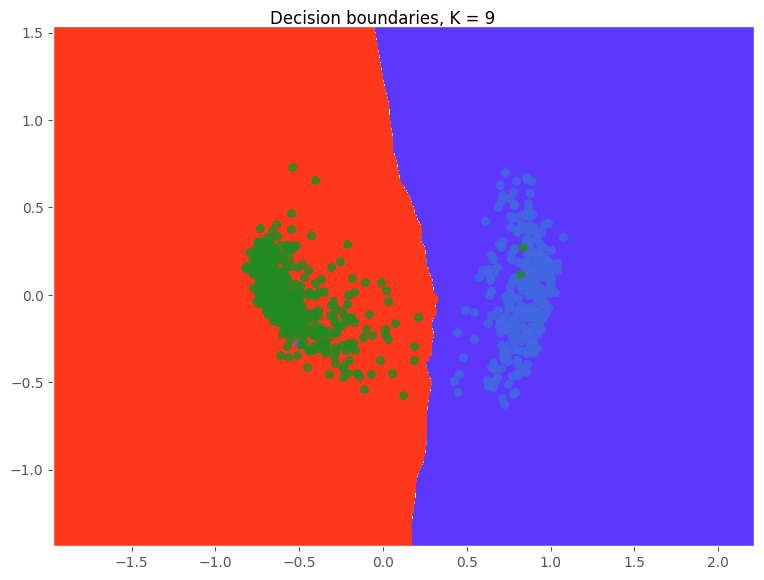

In [29]:
myColours = ['royalblue','forestgreen','ghostwhite']

plotDecisionBoundary(knn, X_train_pca, y_train, colors =  myColours)

In [26]:
# Display the accuracy score of the test data/labels, computed by the KNeighbors model.

print(knn.score(X_test_pca, y_test))

0.9911242603550295
